# Example: Fit Canonical Phase-Type NHPP Models

This notebook loads the bundled MUSA ss1a dataset and fits an exponential NHPP model.

In [1]:
# initialize
import importlib.resources as resources

import pandas as pd
import pysrat.nhpp as srm
from pysrat.data import NHPPData

In [2]:
# data_path = resources.files("pysrat").joinpath("datasets/musa/sys1.csv")
# df = pd.read_csv(data_path)

data = NHPPData.from_csv(
    resources.files("pysrat").joinpath("datasets/musa/sys1g.csv"),
    intervals='time', counts='fault'
)
data

NHPPData(kind='counts', len=96, total=136)
--------------------------------------------------
 idx  intervals counts on_boundary
   0          1      1      0
   1          1      1      0
   2          1      0      0
   3          1      0      0
   4          1      0      0
   5          1      0      0
   6          1      0      0
   7          1      0      0
   8          1      1      0
   9          1      1      0
  10          1      2      0
  11          1      0      0
  12          1      0      0
  13          1      0      0
  14          1      0      0
  15          1      0      0
  16          1      1      0
  17          1      0      0
  18          1      0      0
  19          1      9      0
   ...
--------------------------------------------------
mean=57.3  max=92

In [3]:
models = {
    "phase5": srm.CanonicalPhaseTypeNHPP(5),
    "phase10": srm.CanonicalPhaseTypeNHPP(10),
    "phase20": srm.CanonicalPhaseTypeNHPP(20),
    "phase50": srm.CanonicalPhaseTypeNHPP(50),
    "phase100": srm.CanonicalPhaseTypeNHPP(100),
    "phase200": srm.CanonicalPhaseTypeNHPP(200)
}

for model in models.values():
    model.fit(data, verbose=True)

In [4]:
for model in models.values():
    summary = srm.eic(model, bsample=10)
    print(summary)

{'bias': 5.446290803237133, 'bias.lower': 3.7511318047956577, 'bias.upper': 7.1414498016786085, 'eic': 362.9415857408486, 'eic.lower': 359.55126774396564, 'eic.upper': 366.3319037377316}
{'bias': 7.455102205781705, 'bias.lower': 4.220256743928109, 'bias.upper': 10.6899476676353, 'eic': 354.50021706303346, 'eic.lower': 348.03052613932624, 'eic.upper': 360.9699079867406}
{'bias': 9.269871851067577, 'bias.lower': 6.704577595999956, 'bias.upper': 11.8351661061352, 'eic': 343.2497317902113, 'eic.lower': 338.119143280076, 'eic.upper': 348.3803203003465}
{'bias': 13.992370378068875, 'bias.lower': 9.798514893594692, 'bias.upper': 18.186225862543058, 'eic': 342.4423733255916, 'eic.lower': 334.05466235664323, 'eic.upper': 350.83008429454}


/Users/okamu/Documents/pysrat/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


{'bias': inf, 'bias.lower': nan, 'bias.upper': nan, 'eic': inf, 'eic.lower': nan, 'eic.upper': nan}
{'bias': inf, 'bias.lower': nan, 'bias.upper': nan, 'eic': inf, 'eic.lower': nan, 'eic.upper': nan}


<Axes: xlabel='time', ylabel='# of faults'>

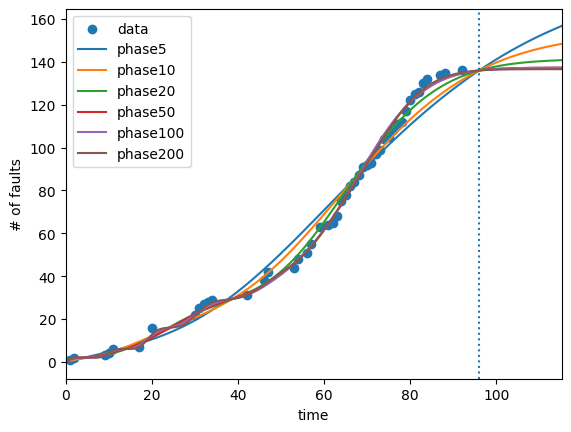

In [5]:
srm.plot_mvf(data, models)

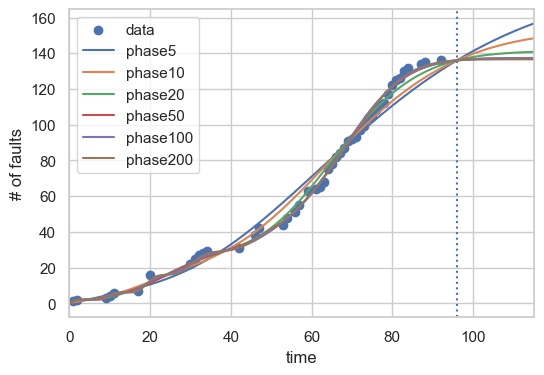

In [6]:
# seaborn example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
srm.plot_mvf(data, models, ax=ax)
plt.show()


<Axes: xlabel='time', ylabel='# of faults'>

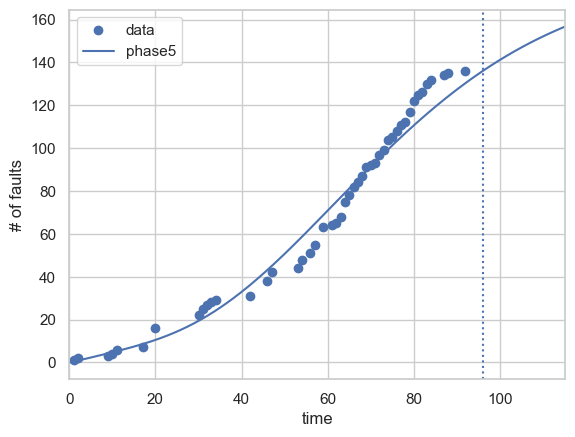

In [7]:
best_key = min(models, key=lambda k: models[k].aic_)
srm.plot_mvf(data, {best_key: models[best_key]})